In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [83]:
df=pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [84]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [85]:
df.drop(columns=['Serial No.'],inplace=True)

In [86]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [88]:
df.duplicated().sum()

0

In [89]:
df.shape

(500, 8)

In [90]:
X=df.iloc[:,:-1]
X.shape

(500, 7)

In [91]:
y=df.iloc[:,-1]

In [92]:
y.shape

(500,)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [95]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [96]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaled=MinMaxScaler()

In [99]:
X_train_scaled=scaled.fit_transform(X_train)


In [100]:
X_train_scaled.shape

(400, 7)

In [101]:
X_test_scaled=scaled.transform(X_test)

In [102]:
X_test_scaled.shape

(100, 7)

In [168]:
model=Sequential()
model.add(Dense(7,input_dim=7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))


In [169]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_33 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics='accuracy')

In [171]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 16ms/step - loss: 0.1931 - accuracy: 0.0000e+00 - val_loss: 0.1385 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.0000e+00 - val_loss: 0.0824 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.0000e+00 - val_loss: 0.0567 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0518 - accuracy: 0.0000e+00 - val_loss: 0.0487 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0461 - accuracy: 0.0000e+00 - val_loss: 0.0448 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.0407 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.0000e+00 - 

In [172]:
import matplotlib.pyplot as plt

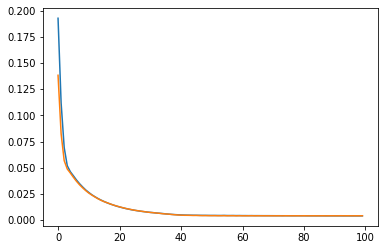

In [173]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [175]:
y_pred=model.predict(X_test_scaled)

In [176]:
from sklearn.metrics import r2_score

In [177]:
r2_score(y_pred,y_test)

0.7372732815484181